## Simple Plots

Lets import some Libraries

In [1]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.io as pio
pio.templates.default = "plotly"

In [109]:
df=pd.read_csv('data/2020-28thJuly_7cities.csv')
df['Date']=pd.to_datetime(df['Date'],format='%d/%m/%Y')
df.head(5)

,Date,Country,City,Specie,count,min,max,median,variance
0,2019-12-30,IN,Bengaluru,co,232,1.6,28.6,8.6,228.74
1,2019-12-31,IN,Bengaluru,co,217,0.4,29.7,8.9,287.50
2,2020-01-01,IN,Bengaluru,co,180,1.2,40.2,9.8,246.08
3,2020-01-02,IN,Bengaluru,co,192,0.2,60.3,9.3,570.86
4,2020-01-03,IN,Bengaluru,co,237,0.7,86.4,8.0,523.38


Lets see the Cities and the pollutants

In [110]:
print(df['City'].unique())
print(df['Specie'].unique())

## 24-hour means unless otherwise specified. Using 8-hour as a proxy when unavailable
pollutant_who = {}
pollutant_who['co']   = 0
pollutant_who['no2']  = 0
pollutant_who['o3']   = 100 ##  8-hour mean
pollutant_who['pm10'] = 50
pollutant_who['pm25'] = 25
pollutant_who['so2']  = 20  

## annual in 'industrial, residential, rural, others' areas
pollutant_naaqs = {}
pollutant_naaqs['co']   = 2   ##  8-hour mean
pollutant_naaqs['no2']  = 80
pollutant_naaqs['o3']   = 100 ##  8-hour mean
pollutant_naaqs['pm10'] = 100
pollutant_naaqs['pm25'] = 60
pollutant_naaqs['so2']  = 80  

# Dates 
start='2020-01-01'
end='2020-07-28'
pollutant_who['pm25']

['Bengaluru' 'Chennai' 'Delhi' 'Hyderabad' 'Kolkata' 'Mumbai'
 'Visakhapatnam']
['co' 'dew' 'humidity' 'no2' 'o3' 'pm10' 'pm25' 'pressure' 'so2'
 'temperature']


25

Focusing on PM 2.5

In [111]:
gas=['pm25']
df1=df[df['Specie'].isin(gas)]
df1=df1.reset_index()

Lets make a simple bar chart

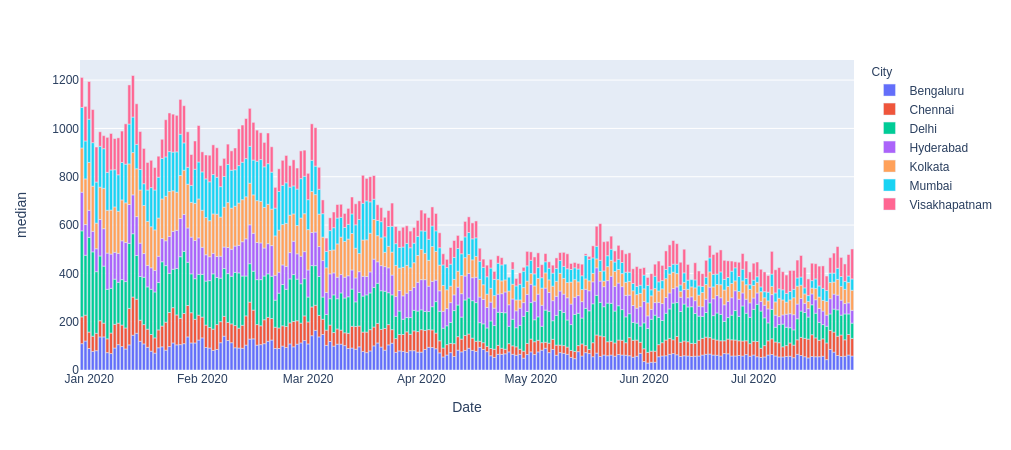

In [112]:
fig=px.bar(df1,'Date','median',color='City')
#fig.update_layout(title="PM 2.5 for Indian cities")
fig.show()
fig.write_image(f'images/pm2.5_barchart.png',width=1500,height=600)

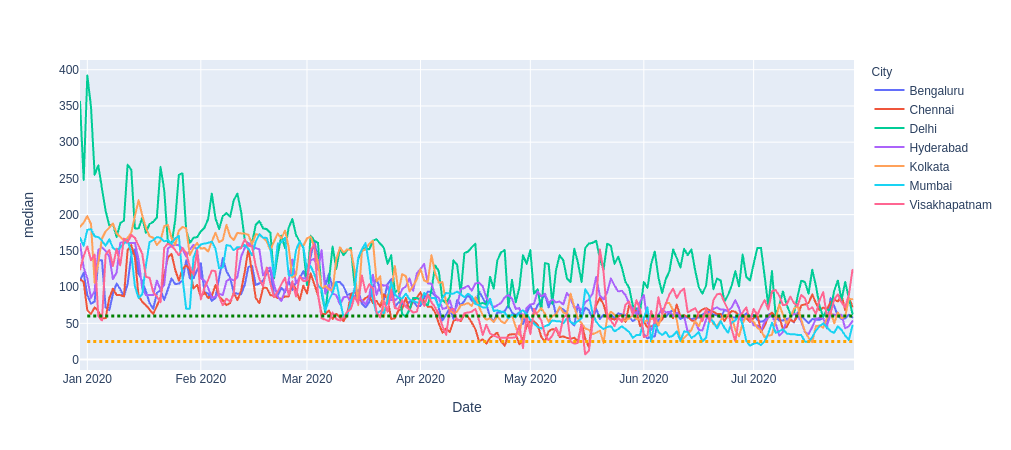

In [113]:
fig=px.line(df1,x='Date',y='median',color='City')
fig.add_shape(type="line",
            x0=start,
            y0=25,
            x1=end,
            y1=25,
            line=dict(
                color="orange",
                width=3,
                dash="dot",
            ))
fig.add_shape(type="line",
            x0=start,
            y0=60,
            x1=end,
            y1=60,
            line=dict(
                color="green",
                width=3,
                dash="dot",
            ))
#fig.update_layout(title="PM 2.5 for Indian cities")
fig.show()

Too crowded, right? Lets do it for fewer cities.

In [114]:
city=['Mumbai','Delhi','Kolkata']
dfc=df1[df1['City'].isin(city)]

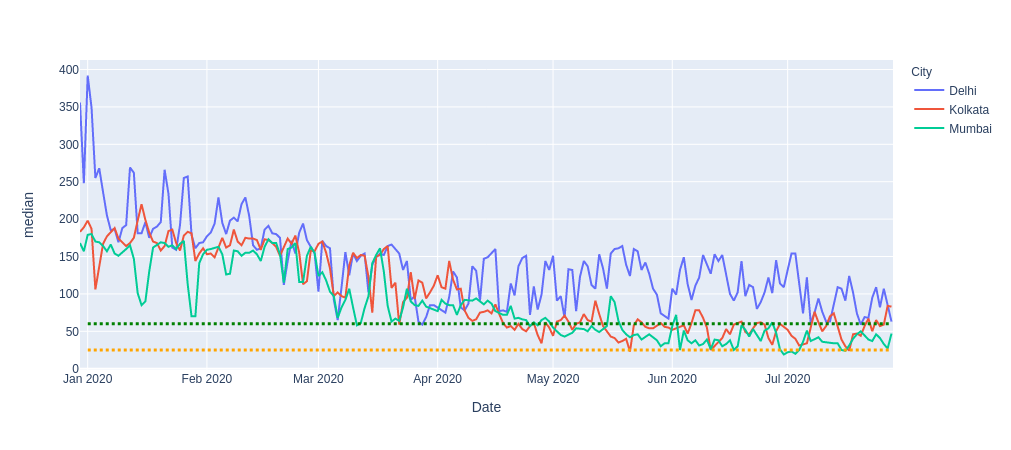

In [115]:
fig=px.line(dfc,x='Date',y='median',color='City')
fig.add_shape(type="line",
            x0=start,
            y0=25,
            x1=end,
            y1=25,
            line=dict(
                color="orange",
                width=3,
                dash="dot",
            ))
fig.add_shape(type="line",
            x0=start,
            y0=60,
            x1=end,
            y1=60,
            line=dict(
                color="green",
                width=3,
                dash="dot",
            ))
fig.show()
fig.write_image(f'images/pm2.5_line_chart_3.png',width=1500,height=600)

Lets focus on Mumbai

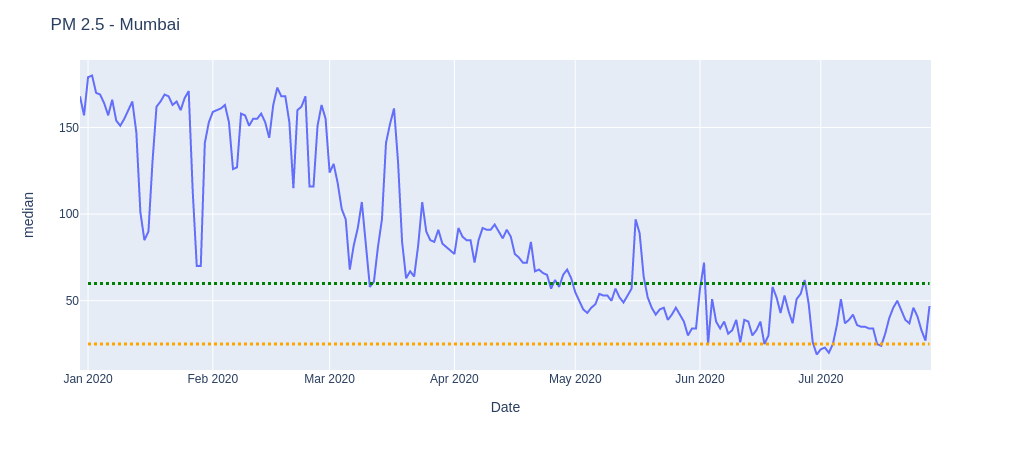

In [116]:
dfc=df1[df1['City'].isin(['Mumbai'])]
fig=px.line(dfc,x='Date',y='median',color='City')
fig.add_shape(type="line",
            x0=start,
            y0=25,
            x1=end,
            y1=25,
            line=dict(
                color="orange",
                width=3,
                dash="dot",
            ))
fig.add_shape(type="line",
            x0=start,
            y0=60,
            x1=end,
            y1=60,
            line=dict(
                color="green",
                width=3,
                dash="dot",
            ))
fig.update_layout(title="PM 2.5 - Mumbai",showlegend=False)
fig.show()
fig.write_image(f'images/pm2.5_mumbai.png',width=1500,height=600)

Lets generate PM 2.5 for all cities 

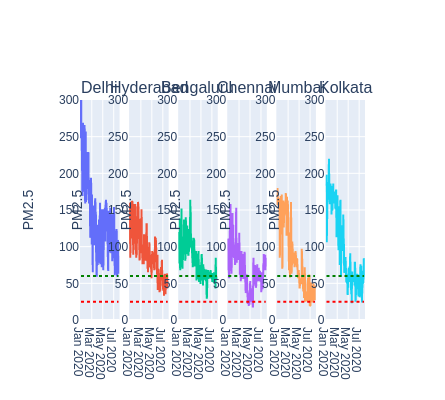

In [120]:
city=['Delhi','Hyderabad','Bengaluru','Chennai','Mumbai','Kolkata']
p=[1,1,1,2,2,2]
h=[1,2,3,1,2,3]
fig = make_subplots(
rows=1, cols=6,
#shared_yaxes=True,
subplot_titles=("Delhi", "Hyderabad", "Bengaluru", "Chennai",'Mumbai','Kolkata'))
for l,i in enumerate(city):
    dff=df1[df1['City'].isin([i])]
    fig.add_trace(go.Scatter(x=dff['Date'], y=dff['median']),row=1, col=l+1)
    fig.add_shape(go.layout.Shape(type="line", x0=start, y0=pollutant_who['pm25'], x1=end, y1=pollutant_who['pm25'],
                                  line=dict(color='red', width=2,dash='dot'),),row=1,col=l+1)
    fig.add_shape(go.layout.Shape(type="line", x0=start, y0=pollutant_naaqs['pm25'], x1=end, y1=pollutant_naaqs['pm25'],
                                  line=dict(color='green', width=2,dash='dot'),),row=1,col=l+1)
    fig.update_yaxes(title='PM2.5',range=[0, 300], row=1, col=l+1)
fig.update_layout(height=400, width=2000,showlegend=False)
fig.update_layout(yaxis=dict(range=[0,300]))
fig.show()
fig.write_image(f'images/pm2.5_all_cities.png')

[401.3308575286968, 358.953889278206, 24.890381731424675, 11.189351789331534, 40.81830519918974, 45.959540850776506]


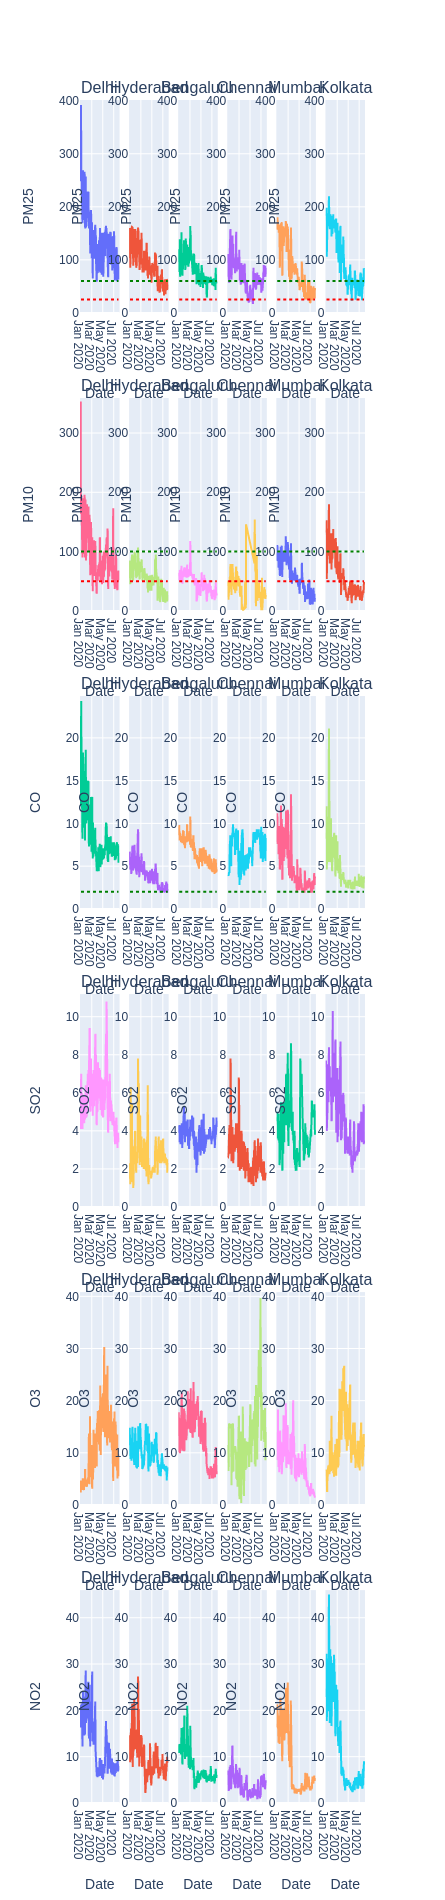

In [121]:
city=['Delhi','Hyderabad','Bengaluru','Chennai','Mumbai','Kolkata']
pollutant=['pm25','pm10','co','so2','o3','no2']
polmax=[]
for i in pollutant:
    dr=df[df['Specie'].isin([i])]
    polmax.append(dr['median'].max()+(dr['median'].mean()/10))
print(polmax)
title=[]
[title.append(i) for _ in range(6) for i in city]
fig = make_subplots(
rows=6, cols=6,
#shared_yaxes=True,
subplot_titles=title,
vertical_spacing=0.05
)
for m,j in enumerate(pollutant):
    for l,i in enumerate(city):
        dff=df[df['Specie'].isin([j])]
        dfff=dff[dff['City'].isin([i])]
        fig.add_trace(go.Scatter(x=dfff['Date'], y=dfff['median']),row=m+1, col=l+1)
        if pollutant_who[j]:
            fig.add_shape(go.layout.Shape(type="line", x0=start, y0=pollutant_who[j], x1=end, y1=pollutant_who[j],
                                            line=dict(color='red', width=2,dash='dot'),),row=m+1,col=l+1)
        if pollutant_naaqs[j]:
            fig.add_shape(go.layout.Shape(type="line", x0=start, y0=pollutant_naaqs[j], x1=end, y1=pollutant_naaqs[j],
                                            line=dict(color='green', width=2,dash='dot'),),row=m+1,col=l+1)
        fig.update_yaxes(title=j.upper(),range=[0, polmax[m]], row=m+1, col=l+1)
        fig.update_xaxes(title="Date",row=m+1, col=l+1)
fig.update_layout(height=1900, width=2000,showlegend=False)
#fig.update_layout(yaxis=dict(range=[0,300]))
fig.show()
fig.write_image(f'images/pm2.5all_all_cities_trans.png')

Plot them all!

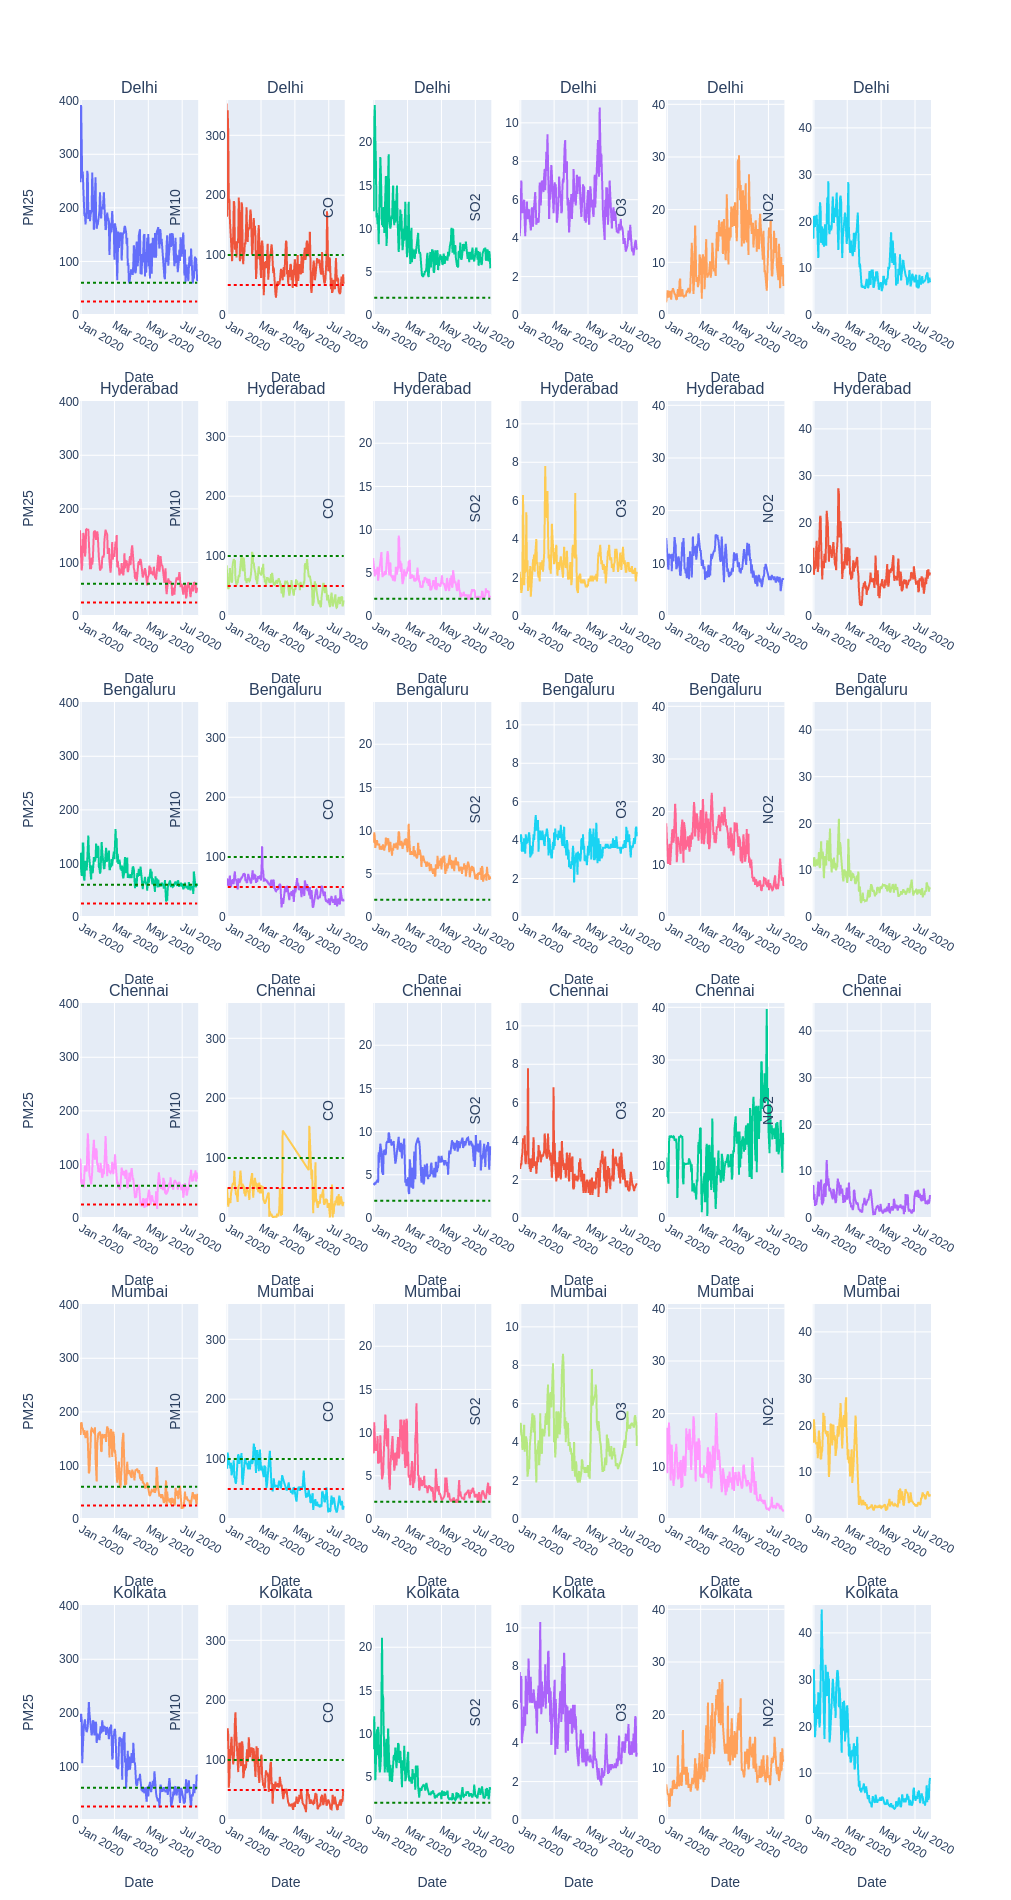

In [119]:
city=['Delhi','Hyderabad','Bengaluru','Chennai','Mumbai','Kolkata']
pollutant=['pm25','pm10','co','so2','o3','no2']
titles=[]
polmax=[]
for i in pollutant:
    dr=df[df['Specie'].isin([i])]
    polmax.append(dr['median'].max()+(dr['median'].mean()/10))
for i in city:
    for j in pollutant:
        titles.append(i)
fig = make_subplots(
rows=6, cols=6,
subplot_titles=titles,
vertical_spacing=0.05
)
for m,i in enumerate(city):
    for n,j in enumerate(pollutant):
        dff=df[df['City'].isin([i])]
        dff=dff[dff['Specie'].isin([j])]
        fig.add_trace(go.Scatter(x=dff['Date'], y=dff['median']),row=m+1, col=n+1)
        if pollutant_who[j]:
            fig.add_shape(go.layout.Shape(type="line", x0=start, y0=pollutant_who[j], x1=end, y1=pollutant_who[j],
                                            line=dict(color='red', width=2,dash='dot'),),row=m+1,col=n+1)
        if pollutant_naaqs[j]:
            fig.add_shape(go.layout.Shape(type="line", x0=start, y0=pollutant_naaqs[j], x1=end, y1=pollutant_naaqs[j],
                                            line=dict(color='green', width=2,dash='dot'),),row=m+1,col=n+1)
        fig.update_yaxes(title=j.upper(),range=[0, polmax[m]], row=m+1, col=l+1)
        fig.update_yaxes(title=j.upper(),range=[0, polmax[n]], row=m+1, col=n+1)
        fig.update_xaxes(title="Date",row=m+1, col=n+1)
fig.update_layout(height=1900, width=2000,showlegend=False)
fig.show()        
fig.write_image(f'images/all_pollutants.png')